In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn import tree

# Decission Tree for Classification

In [56]:
from sklearn.datasets import load_iris
iris = load_iris()

In [57]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=2)
#dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(133.92000000000002, 181.2, 'X[2] <= 2.45\ngini = 0.665\nsamples = 105\nvalue = [36, 37, 32]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.75\ngini = 0.497\nsamples = 69\nvalue = [0, 37, 32]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.067\nsamples = 29\nvalue = [0, 1, 28]')]

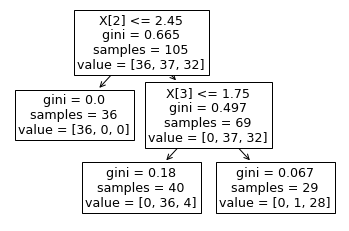

In [59]:
tree.plot_tree(dtree) 

In [60]:
ppred = dtree.predict_proba(X_test)
ppred

array([[0.        , 0.9       , 0.1       ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.9       , 0.1       ],
       [0.        , 0.03448276, 0.96551724],
       [0.        , 0.9       , 0.1       ],
       [0.        , 0.03448276, 0.96551724],
       [0.        , 0.03448276, 0.96551724],
       [0.        , 0.03448276, 0.96551724],
       [0.        , 0.9       , 0.1       ],
       [0.        , 0.9       , 0.1       ],
       [0.        , 0.9       , 0.1       ],
       [0.        , 0.03448276, 0.96551724],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.9       , 0.1       ],
       [0.        , 0.03448276, 0.96551724],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.9       , 0.1       ],
       [0.

In [61]:
# The possible values for the probability
38/(38+4), 1-38/(38+4)

(0.9047619047619048, 0.09523809523809523)

In [62]:
np.argmax(ppred,axis=1) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True])

In [63]:
np.mean(np.argmax(ppred,axis=1) == y_test)

0.9777777777777777

### Decission Tree for Regression

Taken from https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

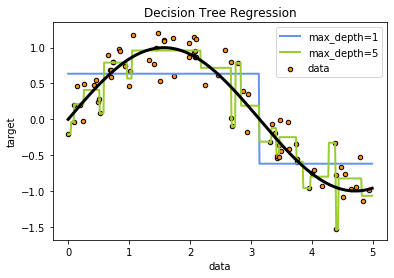

In [81]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0,0.25,80)
#y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=1)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=1", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test[:,0], np.sin(X_test[:,0]), linewidth=3, color='black')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

#### Observations

* Deep Trees have low bias, but hight variance